# **Proyek Analisis Data: [Air Quality Dataset]**
- **Nama:** Felicia Salim
- **Email:** feliciasalim08@gmail.com
- **ID Dicoding:** ffeliciasalim

## **Menentukan Pertanyaan Bisnis**

- Apa korelasi antar polutan yang mempengaruhi kualitas udara dari tahun 2013 hingga 2017 di stasiun Dingling dan Changping?
- Bagaimana perbandingan tren tingkat polutan di udara stasiun Dingling dan Changping dari tahun 2013 hingga 2017?
- Pada jam berapa polutan-polutan di udara mencapai titik tertinggi di stasiun Dingling dan Changping?

## **Import Semua Packages/Library yang Digunakan**

Instal semua library yang akan digunakan untuk analisis data, yaitu Pandas, Seaborn, & Matplotlib.

In [256]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Data Wrangling**

Data Wrangling merupakan proses yang dilakukan pertama kali dalam siklus analisis data. Data Wrangling mencakup pengumpulan data, penilaian data, dan pembersihan data.

### Gathering Data

Pada tahap ini, data yang dikumpul adalah data kualitas udara pada tahun 2013 hingga 2017 dari dua stasiun, yaitu stasiun Dingling dan stasiun Changping. Dataset ini diambil dari [Github](https://github.com/marceloreis/HTI/tree/master). Kedua CSV tersebut digabung (concat) agar lebih mudah dianalisis nantinya.

In [257]:
#Load dataset kualitas udara di stasiun Dingling
dingling_df = pd.read_csv('PRSA_Data_Dingling_20130301-20170228.csv', delimiter=",")
dingling_df.head(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
5,6,2013,3,1,5,6.0,6.0,3.0,4.0,200.0,79.0,-4.5,1022.6,-19.5,0.0,NNW,1.7,Dingling
6,7,2013,3,1,6,5.0,10.0,3.0,4.0,200.0,77.0,-4.5,1023.4,-19.5,0.0,NNW,1.8,Dingling
7,8,2013,3,1,7,5.0,6.0,3.0,2.0,200.0,80.0,-2.1,1024.6,-20.0,0.0,NW,2.5,Dingling
8,9,2013,3,1,8,8.0,7.0,3.0,3.0,200.0,79.0,-0.2,1025.2,-20.5,0.0,NNW,2.8,Dingling
9,10,2013,3,1,9,8.0,8.0,3.0,2.0,200.0,81.0,0.6,1025.3,-20.4,0.0,NNW,3.8,Dingling


In [258]:
#Load dataset kualitas udara di stasiun Changping
changping_df = pd.read_csv('PRSA_Data_Changping_20130301-20170228.csv', delimiter=",")
changping_df.head(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
5,6,2013,3,1,5,3.0,3.0,10.0,17.0,400.0,71.0,-4.5,1022.6,-19.5,0.0,NNW,1.7,Changping
6,7,2013,3,1,6,4.0,6.0,12.0,22.0,500.0,65.0,-4.5,1023.4,-19.5,0.0,NNW,1.8,Changping
7,8,2013,3,1,7,3.0,6.0,25.0,39.0,600.0,48.0,-2.1,1024.6,-20.0,0.0,NW,2.5,Changping
8,9,2013,3,1,8,9.0,25.0,13.0,42.0,700.0,46.0,-0.2,1025.2,-20.5,0.0,NNW,2.8,Changping
9,10,2013,3,1,9,11.0,29.0,5.0,18.0,500.0,73.0,0.6,1025.3,-20.4,0.0,NNW,3.8,Changping


In [259]:
#Gabung kedua dataset
final_df = pd.concat([dingling_df, changping_df], ignore_index=True)
print('Dataframe: ', final_df.shape) #untuk mengetahui jumlah baris & kolom
final_df.head(10)

Dataframe:  (70128, 18)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
5,6,2013,3,1,5,6.0,6.0,3.0,4.0,200.0,79.0,-4.5,1022.6,-19.5,0.0,NNW,1.7,Dingling
6,7,2013,3,1,6,5.0,10.0,3.0,4.0,200.0,77.0,-4.5,1023.4,-19.5,0.0,NNW,1.8,Dingling
7,8,2013,3,1,7,5.0,6.0,3.0,2.0,200.0,80.0,-2.1,1024.6,-20.0,0.0,NW,2.5,Dingling
8,9,2013,3,1,8,8.0,7.0,3.0,3.0,200.0,79.0,-0.2,1025.2,-20.5,0.0,NNW,2.8,Dingling
9,10,2013,3,1,9,8.0,8.0,3.0,2.0,200.0,81.0,0.6,1025.3,-20.4,0.0,NNW,3.8,Dingling


**Insight:**
- Terdapat 18 fitur/kolom dan 70128 baris untuk gabungan dataset yang digunakan.

### Assessing Data

Pada tahap ini akan dilakukan pengecekan data seperti data tidak sesuai, data nil, data duplikat, ataupun outlier.

In [ ]:
#Cek tipe data dalam setiap kolom
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       70128 non-null  int64  
 1   year     70128 non-null  int64  
 2   month    70128 non-null  int64  
 3   day      70128 non-null  int64  
 4   hour     70128 non-null  int64  
 5   PM2.5    68575 non-null  float64
 6   PM10     68890 non-null  float64
 7   SO2      68770 non-null  float64
 8   NO2      68227 non-null  float64
 9   CO       66595 non-null  float64
 10  O3       68310 non-null  float64
 11  TEMP     70022 non-null  float64
 12  PRES     70028 non-null  float64
 13  DEWP     70022 non-null  float64
 14  RAIN     70026 non-null  float64
 15  wd       69848 non-null  object 
 16  WSPM     70042 non-null  float64
 17  station  70128 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 9.6+ MB


In [ ]:
#Cek data nil
final_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,1553
PM10,1238
SO2,1358
NO2,1901
CO,3533


In [ ]:
#Cek data duplikat
final_df.duplicated().sum()

0

In [ ]:
final_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,70128.000000,70128.000000,70128.000000,70128.000000,70128.000000,68575.000000,68890.000000,68770.000000,68227.000000,66595.000000,68310.000000,70022.000000,70028.000000,70022.000000,70026.000000,70042.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,68.544806,89.204661,13.356658,35.952739,1029.510759,63.196821,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.177085,1.177205,3.448728,8.800155,6.922236,72.341944,81.699134,18.523594,29.211966,1016.420962,54.302979,11.365232,10.225591,13.822000,0.752894,1.309799
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,16.000000,30.000000,2.000000,14.000000,400.000000,22.705200,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,43.000000,66.000000,6.000000,28.000000,700.000000,54.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,97.000000,125.000000,16.000000,51.000000,1300.000000,86.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


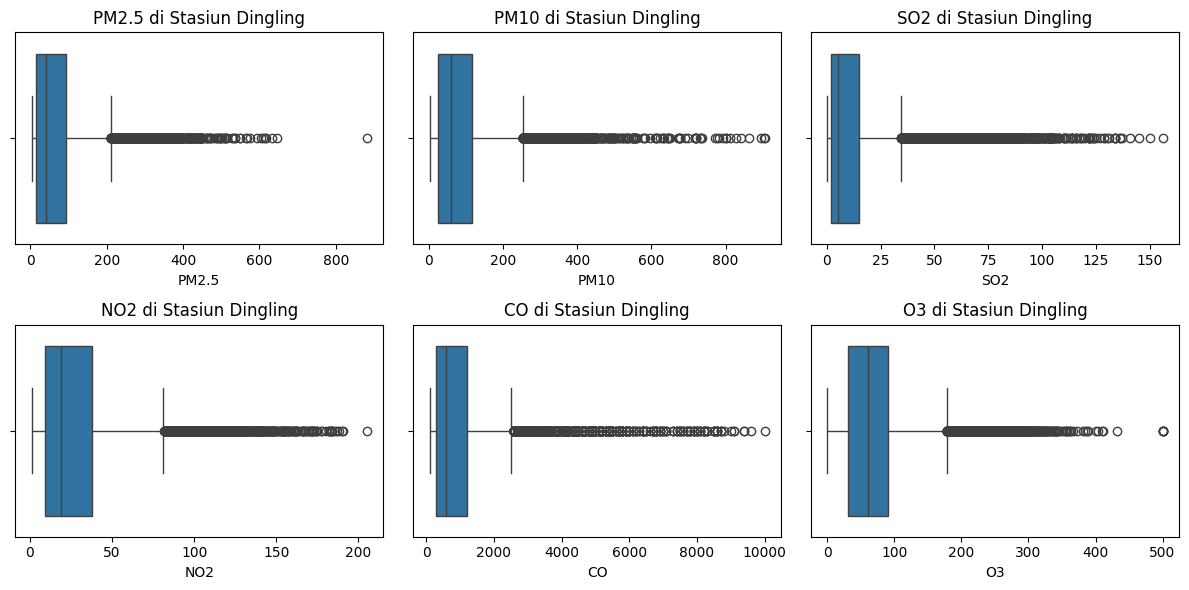

In [260]:
#Cek outliers untuk stasiun Dingling
#Hanya cek outliers untuk polutan karena berhubungan dengan pertanyaan analisis
polutan = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

plt.figure(figsize=(12, 6))

for i, polutan in enumerate(polutan, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=dingling_df[polutan])
    plt.title(f'{polutan} di Stasiun Dingling')

plt.tight_layout()
plt.show()

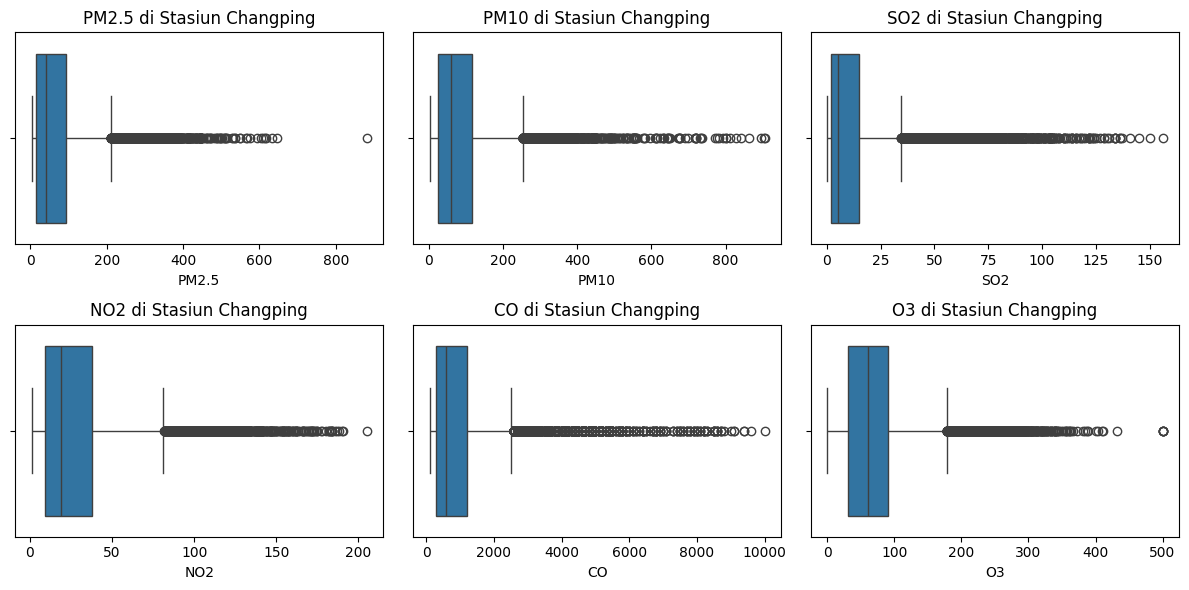

In [ ]:
#Cek outliers untuk stasiun Changping
polutan = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

plt.figure(figsize=(12, 6))

for i, polutan in enumerate(polutan, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=dingling_df[polutan])
    plt.title(f'{polutan} di Stasiun Changping')

plt.tight_layout()
plt.show()

**Insight:**
- Data yang digunakan mencakup integer, float, dan object. Tidak ada kesalahan untuk 'data tidak sesuai' dikarenakan semua tipe data sesuai dengan kolom masing-masing.
- Data yang tergolong dalam missing value terdapat pada kolom 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', dan 'WSPM'. Data-data tersebut harus ditangani agar tidak terjadi kesalahan dalam analisis data. Data tersebut dapat ditangani dengan interpolasi ataupun imputasi. Namun, tidak boleh di drop karena data point setiap kondisi polutan (setiap jamnya) sangat penting dan dapat mempengaruhi hasil analisis.
- Tidak ada data duplikat.
- Pada parameter statistik, tidak ada inaccurate value terdeteksi.
- Terdapat banyak sekali outliers untuk polutan 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', dan 'O3'. Namun, kita tidak bisa membuang data-data tersebut karena dalam menganalisis kualitas udara, setiap data point itu penting. Terdapat kemungkinan bahwa outlier tersebut merupakan situasi dimana lonjakan polutan tersebut yang memang telah terjadi (bukan eror/kesalahan).

### Cleaning Data

Selanjutnya akan dilakukan pembersihan data untuk data yang tidak sesuai, data nil, data duplikat maupun data outliers.

In [261]:
#Pembersihan missing value (NaN) dengan interpolasi
kolom = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3','TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']

for i in kolom:
    final_df[i].interpolate(method='linear', limit_direction='both', inplace=True)

#Cek lagi untuk missing value
final_df.isna().sum()

<ipython-input-261-283b42d5dd63>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df[i].interpolate(method='linear', limit_direction='both', inplace=True)
<ipython-input-261-283b42d5dd63>:5: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  final_df[i].interpolate(method='linear', limit_direction='both', inplace=True)


,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [262]:
#Dikarenakan masih ada missing value pada kolom 'wd' jadi kita akan drop saja karena tidak diperlukan dalam menyelesaikan pertanyaan analisis.
#Kita juga akan drop beberapa data yang memang tidak akan digunakan dalam proses analisis.
final_df.drop(['wd'], axis=1, inplace=True)
final_df.drop(['No'], axis=1, inplace=True)
final_df.drop(['TEMP'], axis=1, inplace=True)
final_df.drop(['PRES'], axis=1, inplace=True)
final_df.drop(['DEWP'], axis=1, inplace=True)
final_df.drop(['RAIN'], axis=1, inplace=True)
final_df.drop(['WSPM'], axis=1, inplace=True)

final_df.isna().sum()

,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0
O3,0


In [ ]:
print("Jumlah data duplikat: ", final_df.duplicated().sum())
final_df.info()
final_df.describe()

Jumlah data duplikat:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     70128 non-null  int64  
 1   month    70128 non-null  int64  
 2   day      70128 non-null  int64  
 3   hour     70128 non-null  int64  
 4   PM2.5    70128 non-null  float64
 5   PM10     70128 non-null  float64
 6   SO2      70128 non-null  float64
 7   NO2      70128 non-null  float64
 8   CO       70128 non-null  float64
 9   O3       70128 non-null  float64
 10  station  70128 non-null  object 
dtypes: float64(6), int64(4), object(1)
memory usage: 5.9+ MB


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3
count,70128.000000,70128.000000,70128.000000,70128.000000,70128.000000,70128.000000,70128.000000,70128.000000,70128.000000,70128.000000
mean,2014.662560,6.522930,15.729637,11.500000,68.915997,89.451144,13.370457,35.754871,1041.051042,64.253522
std,1.177205,3.448728,8.800155,6.922236,72.952157,82.278709,18.593611,29.195560,1021.660304,56.831209
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200
25%,2014.000000,4.000000,8.000000,5.750000,16.000000,30.000000,2.000000,14.000000,400.000000,23.000000
50%,2015.000000,7.000000,16.000000,11.500000,44.000000,66.000000,6.000000,27.000000,700.000000,54.000000
75%,2016.000000,10.000000,23.000000,17.250000,97.000000,125.000000,16.000000,50.000000,1300.000000,86.000000
max,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,500.000000


**Insight:**
- Dataset 'final_df' akhir yang akan digunakan untuk analisis memiliki 10 fitur, yaitu 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', dan 'station'.

## **Exploratory Data Analysis (EDA)**

Setelah Data Wrangling, kita akan melakukan EDA untuk mengeksplor data dan menjawab pertanyaan analisis yang telah ditentukan.

### Explore Parameter Statistik

In [ ]:
final_df.describe(include="all")

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,station
count,70128.000000,70128.000000,70128.000000,70128.000000,70128.000000,70128.000000,70128.000000,70128.000000,70128.000000,70128.000000,70128
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35064
mean,2014.662560,6.522930,15.729637,11.500000,68.915997,89.451144,13.370457,35.754871,1041.051042,64.253522,NaN
std,1.177205,3.448728,8.800155,6.922236,72.952157,82.278709,18.593611,29.195560,1021.660304,56.831209,NaN
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,NaN
25%,2014.000000,4.000000,8.000000,5.750000,16.000000,30.000000,2.000000,14.000000,400.000000,23.000000,NaN
50%,2015.000000,7.000000,16.000000,11.500000,44.000000,66.000000,6.000000,27.000000,700.000000,54.000000,NaN
75%,2016.000000,10.000000,23.000000,17.250000,97.000000,125.000000,16.000000,50.000000,1300.000000,86.000000,NaN


Terdapat beberapa NaN dikarenakan nilainya tidak dapat dihitung. Namun, hal tersebut tidak menjadi masalah. Disini dapat kita lihat rata-rata untuk polutan PM10 adalah 89.45 dan CO adalah 1041.05 yang menandakan bahwa kualitas udara cukup buruk.

In [ ]:
final_df.groupby(by="station").agg({
    "PM10": ["max", "min", "mean", "std"]
})

PM10                           
             max  min       mean        std
station                                    
Changping  999.0  2.0  94.788575  83.928515
Dingling   905.0  2.0  84.113713  80.242081

In [ ]:
final_df.groupby(by="station").agg({
    "CO": ["max", "min", "mean", "std"]
})

CO                                 
               max    min         mean          std
station                                            
Changping  10000.0  100.0  1156.990246  1122.612745
Dingling   10000.0  100.0   925.111838   894.687311

Dapat dibandingkan dari kedua stasiun bahwa polusi sangat parah dikedua lokasi khususnya stasiun Changping. Di stasiun Changping juga sering terjadi lonjakan polutan.

### Histogram Stasiun Dingling untuk Polutan

<ipython-input-66-b3a438f4bdca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dingling_df.drop(['station'], axis=1, inplace=True) #drop karena sudah bernama dingling_df


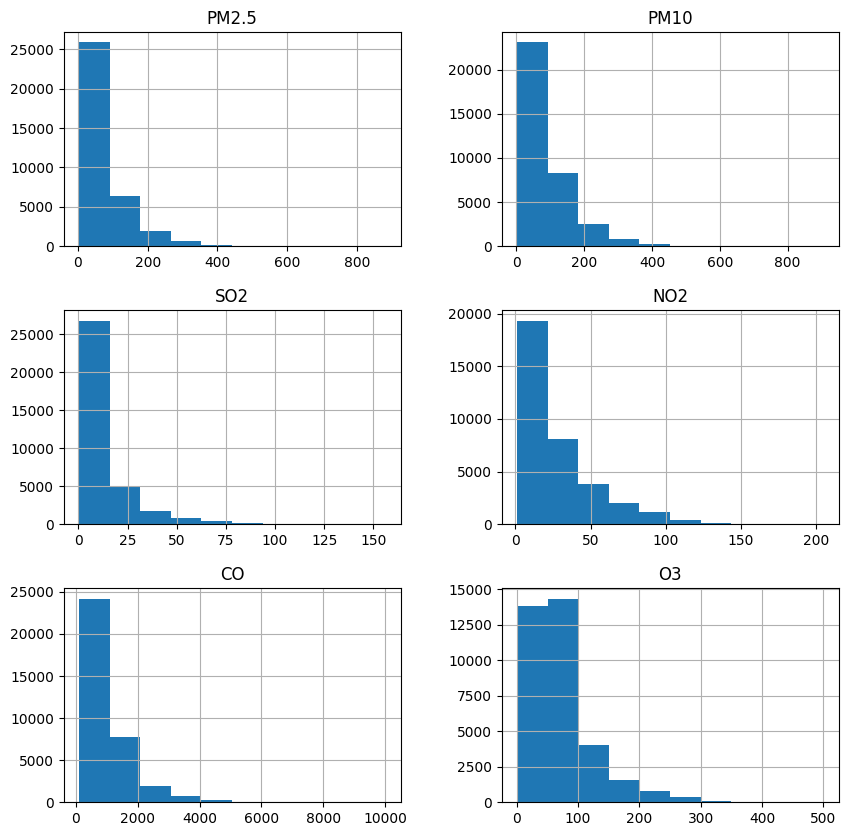

,0
PM2.5,2.026746
PM10,2.150523
SO2,2.785010
NO2,1.707945
CO,2.721368
O3,1.987121


In [ ]:
dingling_df = final_df[final_df['station'] == 'Dingling']
dingling_df.drop(['station'], axis=1, inplace=True) #drop karena sudah bernama dingling_df
polutan = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
dingling_df[polutan].hist(figsize=(10, 10), bins=10)
plt.show()
dingling_df[polutan].skew()

Kolom polutan PM2.5, PM10, SO2, NO2, CO dan O3 berbentuk right skewed distribution (skewness positif). Ini menandakan bahwa terjadi lonjakan besar pada nilai polutan.

### Histogram Stasiun Changping untuk Polutan

<ipython-input-63-00b4d720f84b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  changping_df.drop(['station'], axis=1, inplace=True) #drop karena sudah bernama changping_df


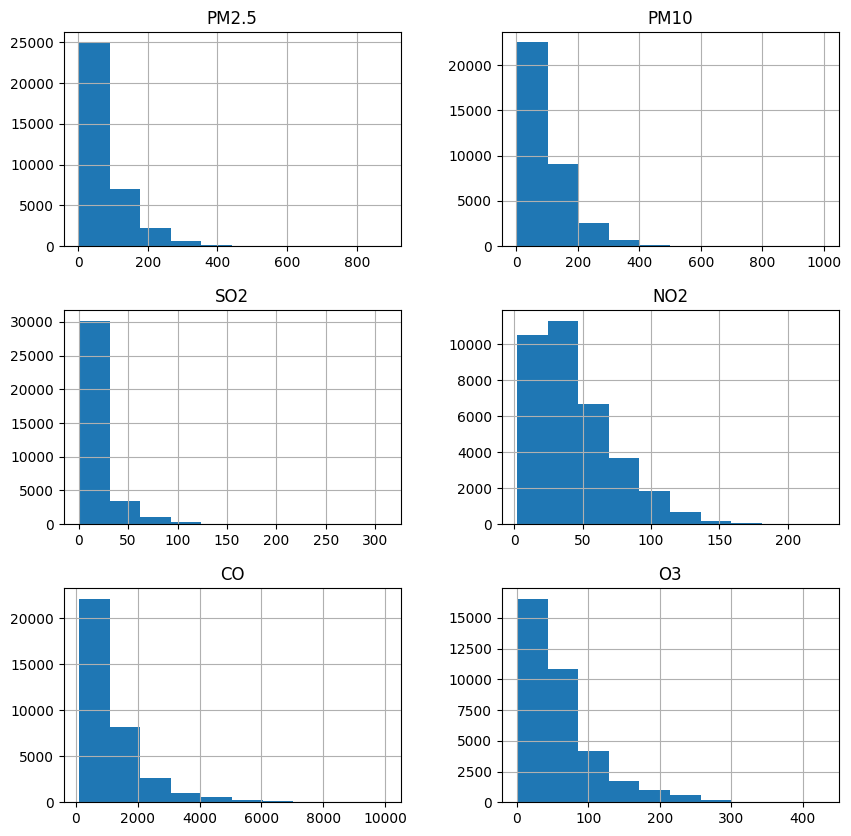

,0
PM2.5,1.904711
PM10,2.105675
SO2,2.948834
NO2,1.188704
CO,2.849863
O3,1.582018


In [ ]:
changping_df = final_df[final_df['station'] == 'Changping']
changping_df.drop(['station'], axis=1, inplace=True) #drop karena sudah bernama changping_df
changping_df[polutan].hist(figsize=(10, 10), bins=10)
plt.show()
changping_df[polutan].skew()

Kolom polutan PM2.5, PM10, SO2, NO2, CO dan O3 berbentuk right skewed distribution (skewness positif). Ini juga menandakan bahwa terjadi lonjakan besar pada nilai polutan. Namun, NO2 menandakan right skew distribution yang kurang sempurna.

### Kolerasi Polutan dalam Stasiun Dingling

In [ ]:
dingling_df[polutan].corr()

,PM2.5,PM10,SO2,NO2,CO,O3
PM2.5,1.000000,0.854997,0.474260,0.714036,0.775850,-0.094578
PM10,0.854997,1.000000,0.453541,0.649564,0.668470,-0.020403
SO2,0.474260,0.453541,1.000000,0.615631,0.521328,-0.187935
NO2,0.714036,0.649564,0.615631,1.000000,0.781272,-0.350872
CO,0.775850,0.668470,0.521328,0.781272,1.000000,-0.291617
O3,-0.094578,-0.020403,-0.187935,-0.350872,-0.291617,1.000000


Hasil menunjukkan bahwa polutan yang mendekati nilai 1 memiliki kolerasi yang kuat dengan polutan lain. Sedangkan kolerasi yang bernilai negatif atau lebih kecil dari 0.5 memiliki kolerasi yang lemah antar polutan.

### Kolerasi Polutan dalam Stasiun Changping

In [ ]:
changping_df[polutan].corr()

,PM2.5,PM10,SO2,NO2,CO,O3
PM2.5,1.000000,0.859519,0.462800,0.670569,0.742917,-0.104135
PM10,0.859519,1.000000,0.426352,0.628669,0.653570,-0.052420
SO2,0.462800,0.426352,1.000000,0.493051,0.517540,-0.190738
NO2,0.670569,0.628669,0.493051,1.000000,0.714572,-0.469231
CO,0.742917,0.653570,0.517540,0.714572,1.000000,-0.301951
O3,-0.104135,-0.052420,-0.190738,-0.469231,-0.301951,1.000000


Hasil menunjukkan bahwa polutan yang mendekati nilai 1 memiliki kolerasi yang kuat dengan polutan lain. Sedangkan kolerasi yang bernilai negatif atau lebih kecil dari 0.5 memiliki kolerasi yang lemah antar polutan. Dapat dilihat bahwa polutan yang sama sekali tidak memiliki korelasi dengan polutan lainnya adalah O3.

### Mengelompokkan data stasiun Dingling sesuai dengan tahun

In [ ]:
dingling_df.groupby(by="year").mean()

,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3
year,,,,,,,,,
2013,7.500000,15.803922,11.5,65.200980,78.884940,13.955578,28.768839,940.035607,64.549386
2014,6.526027,15.720548,11.5,75.643006,91.554865,14.872983,27.365046,890.734399,72.762681
2015,6.526027,15.720548,11.5,64.353124,85.374616,11.322508,26.821221,963.934551,71.166486
2016,6.513661,15.756831,11.5,61.701218,80.707707,7.166041,25.375114,870.810565,75.364925
2017,1.474576,15.288136,11.5,68.281780,78.526483,13.256356,34.271186,1157.062147,53.824859


### Mengelompokkan data stasiun Changping sesuai dengan tahun




In [ ]:
changping_df.groupby(by="year").mean()

,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3
year,,,,,,,,,
2013,7.500000,15.803922,11.5,72.393246,91.176675,19.134785,40.960527,1022.978758,61.132385
2014,6.526027,15.720548,11.5,79.881998,107.611416,21.250228,45.968002,1229.971461,63.019235
2015,6.526027,15.720548,11.5,68.832608,93.275696,11.698721,42.725942,1162.431507,58.307374
2016,6.513661,15.756831,11.5,61.665699,86.632115,8.144126,45.541268,1129.764344,54.002618
2017,1.474576,15.288136,11.5,79.802966,94.150777,16.431497,51.014831,1535.769774,33.010593


### Mengelompokkan data stasiun Dingling sesuai dengan jam

In [ ]:
dingling_df.groupby(by="hour").mean()

,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3
hour,,,,,,,,,
0,2014.66256,6.52293,15.729637,67.381144,81.850518,9.311103,26.279512,947.603001,59.683510
1,2014.66256,6.52293,15.729637,67.127811,79.494923,9.018966,25.453521,941.037840,56.693177
2,2014.66256,6.52293,15.729637,65.499598,77.281530,8.697307,24.524386,928.017968,53.916159
3,2014.66256,6.52293,15.729637,62.780198,73.700789,8.455766,24.356961,879.738228,51.304890
4,2014.66256,6.52293,15.729637,61.028970,71.218532,8.455129,24.187356,868.144320,47.731493
5,2014.66256,6.52293,15.729637,59.477088,69.713501,8.444493,23.977652,871.903937,46.092441
6,2014.66256,6.52293,15.729637,58.364425,69.379038,8.717106,23.849201,871.943208,44.696418
7,2014.66256,6.52293,15.729637,58.535015,72.467504,9.529196,25.007587,879.507365,43.086516
8,2014.66256,6.52293,15.729637,61.020862,77.678612,10.980912,26.431675,901.116696,45.024825


### Mengelompokkan data stasiun Changping sesuai dengan jam

In [ ]:
changping_df.groupby(by="hour").mean()

,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3
hour,,,,,,,,,
0,2014.66256,6.52293,15.729637,72.773445,93.504031,12.499778,44.223048,1192.512561,48.207677
1,2014.66256,6.52293,15.729637,71.851758,90.399402,12.209829,41.949804,1211.916473,43.531114
2,2014.66256,6.52293,15.729637,69.746532,87.241966,14.505127,40.447517,1108.991842,38.617614
3,2014.66256,6.52293,15.729637,67.816985,83.696349,11.320927,40.506657,1116.952270,37.457724
4,2014.66256,6.52293,15.729637,65.354059,80.300447,11.232295,41.233214,1101.227209,34.623269
5,2014.66256,6.52293,15.729637,63.608997,78.645280,11.519847,42.875704,1119.547339,32.833848
6,2014.66256,6.52293,15.729637,63.131527,80.237318,12.003647,44.098762,1206.632432,31.757030
7,2014.66256,6.52293,15.729637,64.246298,86.160066,12.969895,47.403040,1251.408496,28.529818
8,2014.66256,6.52293,15.729637,67.134142,92.667394,15.120862,49.642814,1316.647176,29.142664


**Insight:**
- Histogram pada stasiun Dingling dan Changping keduanya berbentuk right skewed distribution (yang memang menandakan banyak outlier, tapi seperti yang dijelaskan sebelumnya, outlier diputuskan untuk tidak dimodifikasi dikarenakan keperluan untuk mengetahui lonjakan polutan pada setiap data point).
- Stasiun Dingling: Yang memiliki kolerasi kuat antar satu sama lain adalah PM2.5 dan PM10 dengan semua polutan kecuali SO2 dan O3. Di sisi lain, SO2 hanya memiliki korelasi yang kuat dengan NO2 dan CO. NO2 dan CO memiliki korelasi yang kuat dengan semua polutan kecuali O3. Sedangkan O3, memiliki korelasi yang lemah dengan semua polutan.
- Stasiun Changping: Yang memiliki kolerasi kuat antar satu sama lain adalah PM2.5, PM10, dan NO2 dengan semua polutan kecuali SO2 dan O3. Namun berbeda dengan stasiun Dingling, SO2 hanya memiliki korelasi yang kuat dengan CO. CO memiliki korelasi yang kuat dengan semua polutan kecuali O3. Dan yang terakhir, O3 memiliki korelasi yang lemah dengan semua polutan.
- Untuk stasiun Dingling, rekor tertinggi polutan PM2.5 ada di tahun 2014, PM10 di tahun 2014, SO2 juga di tahun 2014, NO2 di tahun 2017, CO juga di tahun 2017, dan O3 di tahun 2016.
- Untuk stasiun Changping, rekor tertinggi polutan PM2.5 ada di tahun 2014, PM10 di tahun 2014, SO2 juga di tahun 2014, NO2 di tahun 2017, CO juga di tahun 2017, dan O3 di tahun 2014.

## **Visualization & Explanatory Analysis**

Bagian terakhir dari proses analisis data, yaitu visualisasi. Visualisasi akan membantu dalam melakukan story telling mengenai penemuan dari data yang dianalisis kepada stakeholder/umum.

### **Pertanyaan 1: Apa korelasi antar polutan yang mempengaruhi kualitas udara dari tahun 2013 hingga 2017 di stasiun Dingling dan Changping?**


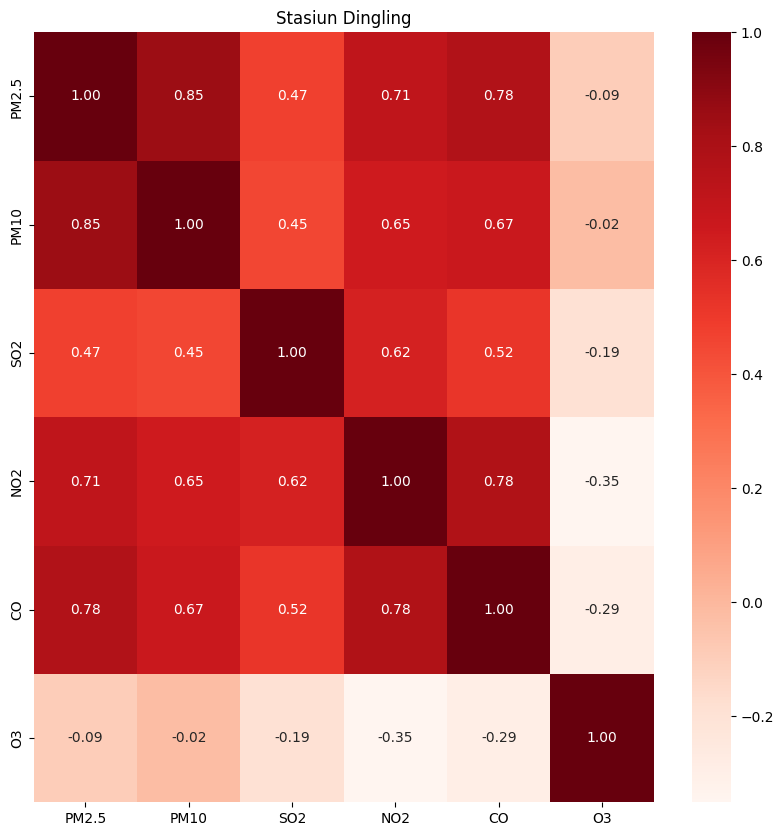

In [ ]:
#Matriks Korelasi
plt.figure(figsize=(10, 10))
sns.heatmap(dingling_df[polutan].corr(), annot=True, fmt='.2f', cmap='Reds')
plt.title('Stasiun Dingling')
plt.show()

**Insight:**
Kolerasi yang kuat ditandai dengan warna yang lebih gelap. Yang memiliki kolerasi kuat antar satu sama lain adalah PM2.5 dan PM10 dengan semua polutan kecuali SO2 dan O3. Di sisi lain, SO2 hanya memiliki korelasi yang kuat dengan NO2 dan CO. NO2 dan CO memiliki korelasi yang kuat dengan semua polutan kecuali O3. Sedangkan O3, memiliki korelasi yang lemah dengan semua polutan.


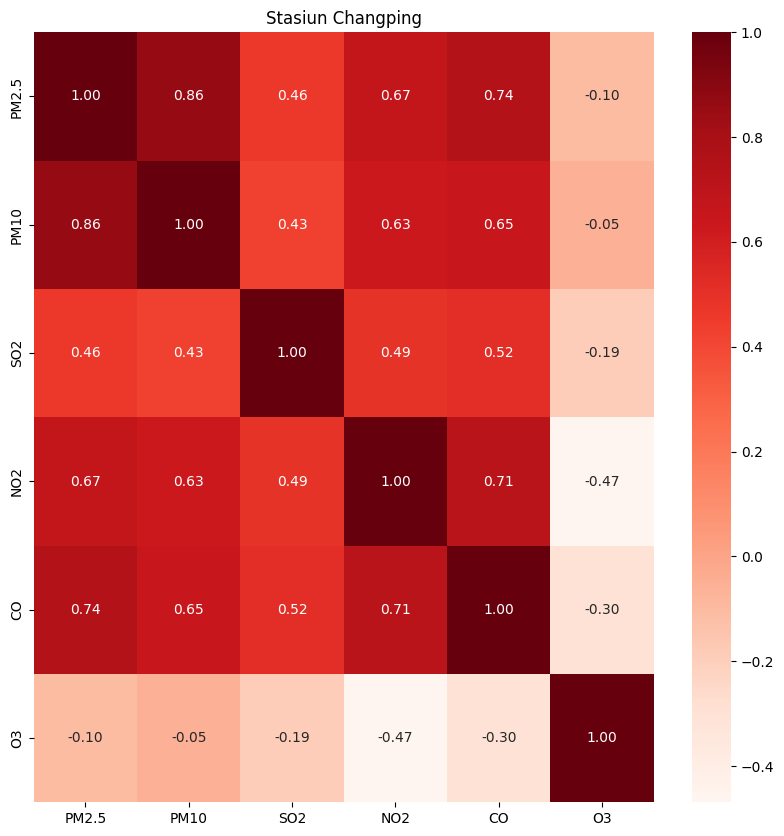

In [ ]:
#Matriks Korelasi
plt.figure(figsize=(10, 10))
sns.heatmap(changping_df[polutan].corr(), annot=True, fmt='.2f', cmap='Reds')
plt.title('Stasiun Changping')
plt.show()

**Insight:**
Yang memiliki kolerasi kuat antar satu sama lain adalah PM2.5, PM10, dan NO2 dengan semua polutan kecuali SO2 dan O3. Namun berbeda dengan stasiun Dingling, SO2 hanya memiliki korelasi yang kuat dengan CO. CO memiliki korelasi yang kuat dengan semua polutan kecuali O3. Dan yang terakhir, O3 memiliki korelasi yang lemah dengan semua polutan.

### **Pertanyaan 2:Bagaimana perbandingan tren tingkat polutan di udara stasiun Dingling dan Changping dari tahun 2013 hingga 2017?**


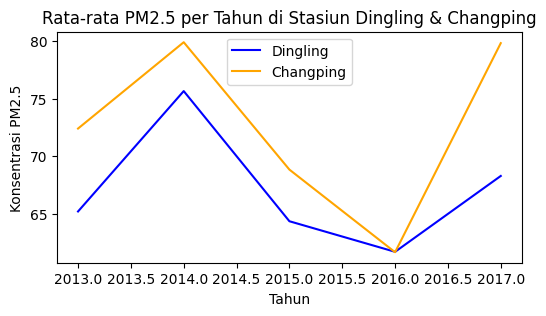

In [ ]:
plt.figure(figsize=(6,3))

plt.plot(dingling_df.groupby(by="year")['PM2.5'].mean(), color='blue', label='Dingling')
plt.plot(changping_df.groupby(by="year")['PM2.5'].mean(), color='orange', label='Changping')

plt.title('Rata-rata PM2.5 per Tahun di Stasiun Dingling & Changping')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi PM2.5')
plt.legend()
plt.show()

**Insight:** Untuk perbandingan polutan PM2.5 pada kedua stasiun, lonjakan terbesar terdapat di tahun 2014. Namun terjadi penurunan dratis sampai tahun 2016 dan terjadi lagi penaikan di tahun 2017.

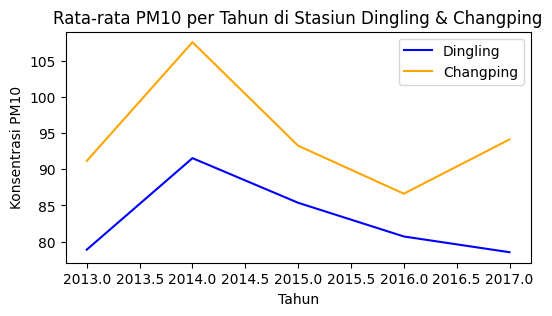

In [ ]:
plt.figure(figsize=(6,3))
plt.plot(dingling_df.groupby(by="year")['PM10'].mean(), color='blue', label='Dingling')
plt.plot(changping_df.groupby(by="year")['PM10'].mean(), color='orange', label='Changping')
plt.title('Rata-rata PM10 per Tahun di Stasiun Dingling & Changping')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi PM10')
plt.legend()
plt.show()

**Insight:** Sama seperti PM2.5, pada PM10 juga terjadi lonjakan terbesar di tahun 2014. Namun kadar stasiun Changping sangat besar jika dibandingkan dengan stasiun DIngling.

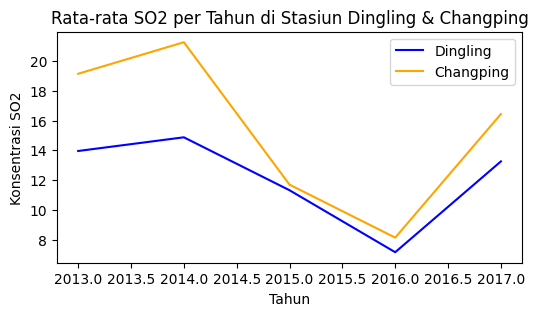

In [ ]:
plt.figure(figsize=(6,3))
plt.plot(dingling_df.groupby(by="year")['SO2'].mean(), color='blue', label='Dingling')
plt.plot(changping_df.groupby(by="year")['SO2'].mean(), color='orange', label='Changping')
plt.title('Rata-rata SO2 per Tahun di Stasiun Dingling & Changping')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi SO2')
plt.legend()
plt.show()

**Insight:** Berbeda dengan polutan sebelumnya, tingkat kadar SO2 sudah memang tinggi dari awal dan mencapai titik tertinggi di tahun 2014. Namun mulai dari tahun 2014 terjadi penurunan kadar SO2 drastis hingga tahun 2016. Kadar SO2 kemudian melonjak lagi dengan cepat sampai tahun 2017.

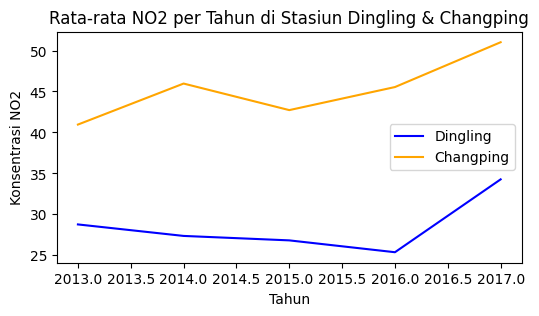

In [ ]:
plt.figure(figsize=(6,3))
plt.plot(dingling_df.groupby(by="year")['NO2'].mean(), color='blue', label='Dingling')
plt.plot(changping_df.groupby(by="year")['NO2'].mean(), color='orange', label='Changping')
plt.title('Rata-rata NO2 per Tahun di Stasiun Dingling & Changping')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi NO2')
plt.legend()
plt.show()

**Insight:** Untuk stasiun Dingling, kadar NO2 menunjukkan hal yang bagus karena ada penurunan hingga tahun 2016. Namun, sangat disayangkan kadar NO2 tiba-tiba melonjak sangat cepat hingga mencapai titik tertinggi pada tahun 2017. Sedangkan untuk stasiun Changping, kadar NO2 sangat tinggi dibandingkan dengan kadar di stasiun Dingling. Kadar NO2 di sana juga cukup mengkhawatirkan karena tidak ada penurunan yang signifikan. Bahkan terjadi lonjakan yang sangat besar dari tahun 2015 hingga 2017 (titik tertinggi).

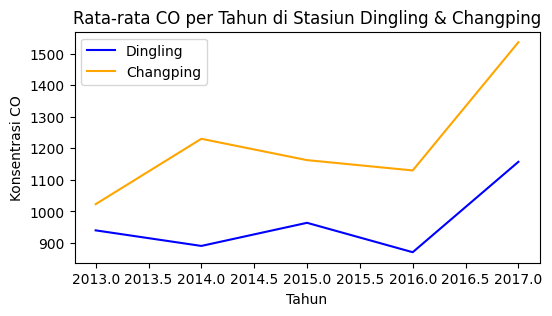

In [ ]:
plt.figure(figsize=(6,3))
plt.plot(dingling_df.groupby(by="year")['CO'].mean(), color='blue', label='Dingling')
plt.plot(changping_df.groupby(by="year")['CO'].mean(), color='orange', label='Changping')
plt.title('Rata-rata CO per Tahun di Stasiun Dingling & Changping')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi CO')
plt.legend()
plt.show()

**Insight:** Bisa dilihat bahwa kadar CO sangat tidak stabil di stasiun Dingling karena terjadi naik turun dalam setahun, dan yang paling parah adalah kadar CO melonjak sangat tinggi pada tahun 2017 pada kedua stasiun.

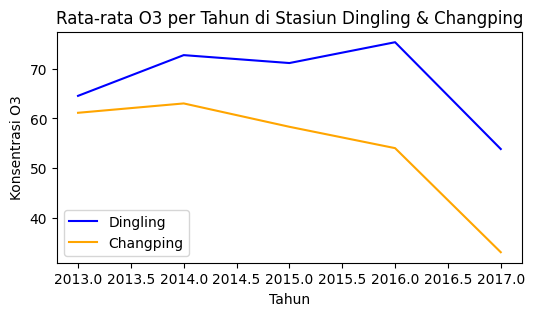

In [ ]:
plt.figure(figsize=(6,3))
plt.plot(dingling_df.groupby(by="year")['O3'].mean(), color='blue', label='Dingling')
plt.plot(changping_df.groupby(by="year")['O3'].mean(), color='orange', label='Changping')
plt.title('Rata-rata O3 per Tahun di Stasiun Dingling & Changping')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi O3')
plt.legend()
plt.show()

**Insight:** Dari semua polutan, dapat dikatakan bahwa polutan O3 mengalami penurunan yang sangat signifikan pada tahun 2017 meskipun sudah mencapai titik tertinggi pada tahun 2016. Di stasiun Changping juga menunjukkan hasil yang bagus karena terjadi penurunan signifikan dan mencapai titik terendah O3 di tahun 2017.

### **Pertanyaan 3: Pada jam berapa polutan-polutan di udara mencapai titik tertinggi di stasiun Dingling dan Changping?**

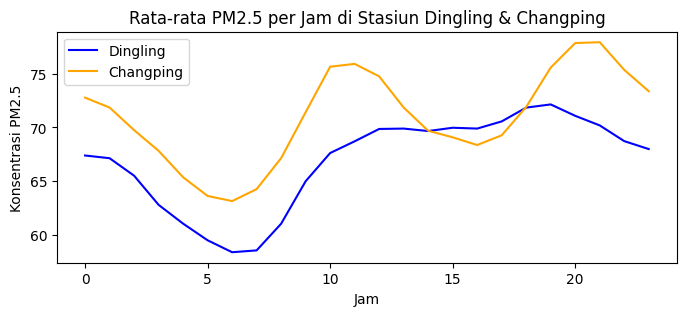

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(dingling_df.groupby(by="hour")['PM2.5'].mean(), color='blue', label='Dingling')
plt.plot(changping_df.groupby(by="hour")['PM2.5'].mean(), color='orange', label='Changping')
plt.title('Rata-rata PM2.5 per Jam di Stasiun Dingling & Changping')
plt.xlabel('Jam')
plt.ylabel('Konsentrasi PM2.5')
plt.legend()
plt.show()

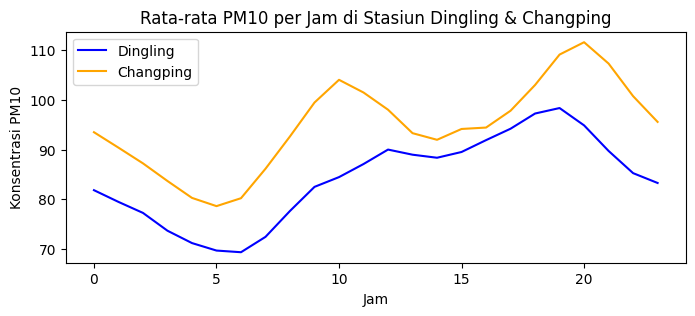

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(dingling_df.groupby(by="hour")['PM10'].mean(), color='blue', label='Dingling')
plt.plot(changping_df.groupby(by="hour")['PM10'].mean(), color='orange', label='Changping')
plt.title('Rata-rata PM10 per Jam di Stasiun Dingling & Changping')
plt.xlabel('Jam')
plt.ylabel('Konsentrasi PM10')
plt.legend()
plt.show()

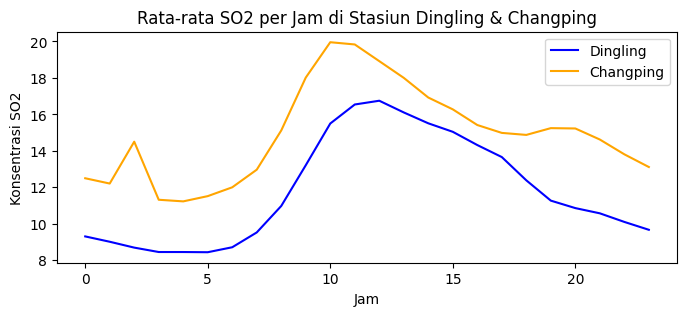

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(dingling_df.groupby(by="hour")['SO2'].mean(), color='blue', label='Dingling')
plt.plot(changping_df.groupby(by="hour")['SO2'].mean(), color='orange', label='Changping')
plt.title('Rata-rata SO2 per Jam di Stasiun Dingling & Changping')
plt.xlabel('Jam')
plt.ylabel('Konsentrasi SO2')
plt.legend()
plt.show()

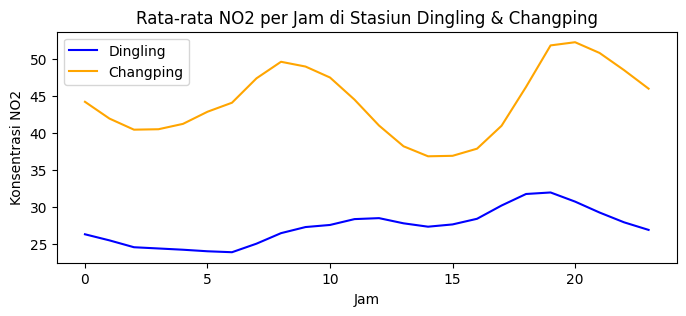

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(dingling_df.groupby(by="hour")['NO2'].mean(), color='blue', label='Dingling')
plt.plot(changping_df.groupby(by="hour")['NO2'].mean(), color='orange', label='Changping')
plt.title('Rata-rata NO2 per Jam di Stasiun Dingling & Changping')
plt.xlabel('Jam')
plt.ylabel('Konsentrasi NO2')
plt.legend()
plt.show()

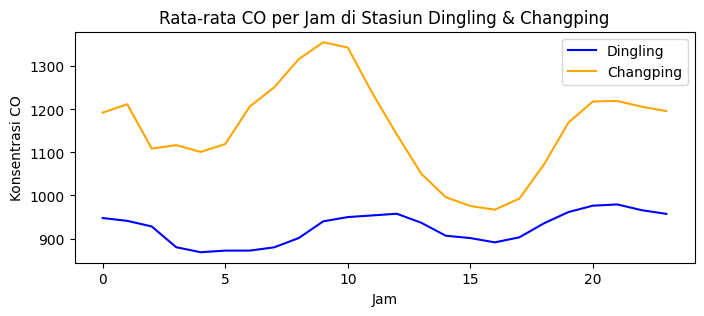

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(dingling_df.groupby(by="hour")['CO'].mean(), color='blue', label='Dingling')
plt.plot(changping_df.groupby(by="hour")['CO'].mean(), color='orange', label='Changping')
plt.title('Rata-rata CO per Jam di Stasiun Dingling & Changping')
plt.xlabel('Jam')
plt.ylabel('Konsentrasi CO')
plt.legend()
plt.show()

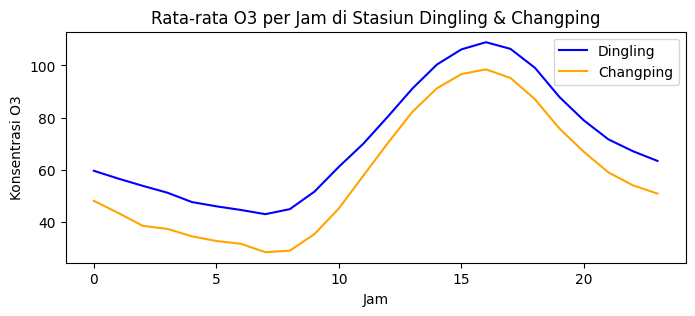

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(dingling_df.groupby(by="hour")['O3'].mean(), color='blue', label='Dingling')
plt.plot(changping_df.groupby(by="hour")['O3'].mean(), color='orange', label='Changping')
plt.title('Rata-rata O3 per Jam di Stasiun Dingling & Changping')
plt.xlabel('Jam')
plt.ylabel('Konsentrasi O3')
plt.legend()
plt.show()

**Insight:**
*   Kadar PM2.5 mencapai titik tertinggi pada pukul 19:00 di stasiun Dingling, dan pukul 21:00 di stasiun Changping.
*   Kadar PM10 mencapai titik tertinggi pada pukul 19:00 di stasiun Dingling, dan pukul 2O:00 di stasiun Changping.
*   Kadar SO2 mencapai titik tertinggi pada pukul 12:00 di stasiun Dingling, dan pukul 10:00 di stasiun Changping.
*   Kadar NO2 mencapai titik tertinggi pada pukul 19:00 di stasiun Dingling, dan pukul 20:00 di stasiun Changping.
*   Kadar CO mencapai titik tertinggi pada pukul 21:00 di stasiun Dingling, dan pukul 09:00 di stasiun Changping.
*   Kadar O3 mencapai titik tertinggi pada pukul 16:00 di stasiun Dingling, dan pukul 16:00 di stasiun Changping.







## **Analisis Lanjutan Clustering Binning**

Analisis lanjutan ini dilakukan untuk mengkategorikan setiap polutan ke 5 kategori yaitu: baik, sedang, tidak sehat, berbahaya, dan sangat berbahaya. Dapat dilihat bahwa 6 polutan dibawah ini terdapat banyak yang memasuki kategori berbahaya/sangat berbahaya. Ini menandakan bahwa kualitas udara di stasiun Dingling dan Changping sangat tidak bagus. (Batas bahaya yang ditentukan mengikuti beberapa artikel pada Google).

In [265]:
final_df['Kategori Keamanan'] = pd.cut(final_df['PM2.5'],
  bins=[0, 25, 50, 100, 300,  500],
  labels=["Baik", "Sedang", "Tidak sehat", "Berbahaya", "Sangat berbahaya"])

final_df[['PM2.5', 'Kategori Keamanan']].sample(10)

,PM2.5,Kategori Keamanan
30962,23.000000,Baik
49873,54.000000,Tidak sehat
9913,115.000000,Berbahaya
29203,128.000000,Berbahaya
45230,91.107692,Tidak sehat
27211,9.000000,Baik
10413,65.000000,Tidak sehat
25711,10.000000,Baik
43540,191.000000,Berbahaya
6401,104.000000,Berbahaya


<ipython-input-266-c8adc2c34bf3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_df, x="Kategori Keamanan", palette="coolwarm")


<Axes: xlabel='Kategori Keamanan', ylabel='count'>

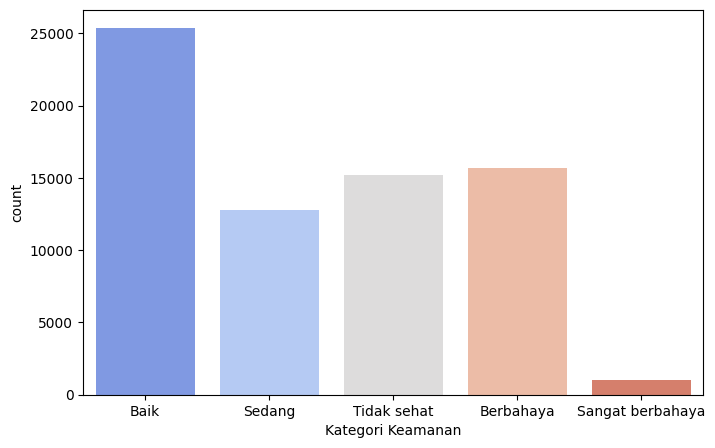

In [266]:
plt.figure(figsize=(8, 5))
sns.countplot(data=final_df, x="Kategori Keamanan", palette="coolwarm")

Dari barchart di atas, dapat kita lihat bahwa mayoritas dari polutan PM2.5 berada di kategori baik sedangkan hanya ada sedikit yang termasuk sangat berbahaya. Namun, masih harus diperhatikan karena kategori berbahaya cukup banyak.

In [267]:
final_df['Kategori Keamanan'] = pd.cut(final_df['PM10'],
  bins=[0, 25, 50, 100, 300, 1000],
  labels=["Baik", "Sedang", "Tidak sehat",  "Berbahaya", "Sangat berbahaya"])

final_df[['PM10', 'Kategori Keamanan']].sample(10)

,PM10,Kategori Keamanan
68454,323.0,Sangat berbahaya
65275,104.0,Berbahaya
33973,51.0,Tidak sehat
29051,55.0,Tidak sehat
7473,120.0,Berbahaya
41296,189.0,Berbahaya
35452,159.0,Berbahaya
1086,129.0,Berbahaya
16002,227.0,Berbahaya
31651,58.0,Tidak sehat


<ipython-input-268-c8adc2c34bf3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_df, x="Kategori Keamanan", palette="coolwarm")


<Axes: xlabel='Kategori Keamanan', ylabel='count'>

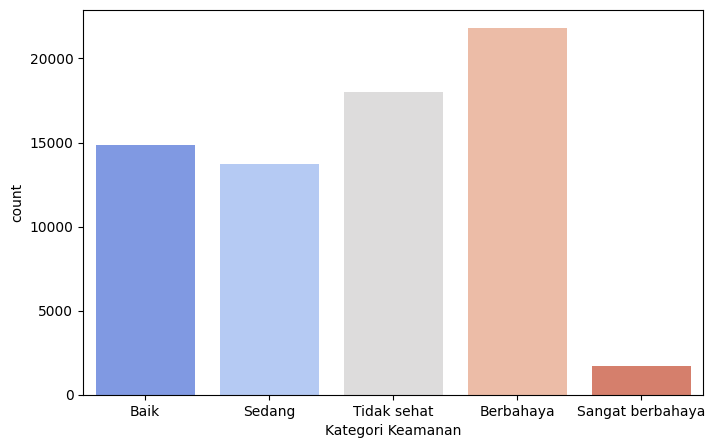

In [268]:
plt.figure(figsize=(8, 5))
sns.countplot(data=final_df, x="Kategori Keamanan", palette="coolwarm")

Dari barchart di atas, dapat kita lihat bahwa mayoritas dari polutan PM10 berada di kategori berbahaya. Ini menandakan bahwa polutan PM10 sangat banyak di stasiun Dingling dan Changping.

In [270]:
final_df['Kategori Keamanan'] = pd.cut(final_df['SO2'],
  bins=[0, 5, 10, 20, 100, 500],
  labels=["Baik", "Sedang", "Tidak sehat", "Berbahaya", "Sangat berbahaya"])

final_df[['SO2', 'Kategori Keamanan']].sample(10)

,SO2,Kategori Keamanan
26015,9.0,Sedang
54527,2.0,Baik
40018,1.0,Baik
31527,2.0,Baik
4745,1.0,Baik
3203,3.0,Baik
53493,4.0,Baik
61645,32.0,Berbahaya
51471,71.0,Berbahaya
52251,60.0,Berbahaya


<ipython-input-271-c8adc2c34bf3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_df, x="Kategori Keamanan", palette="coolwarm")


<Axes: xlabel='Kategori Keamanan', ylabel='count'>

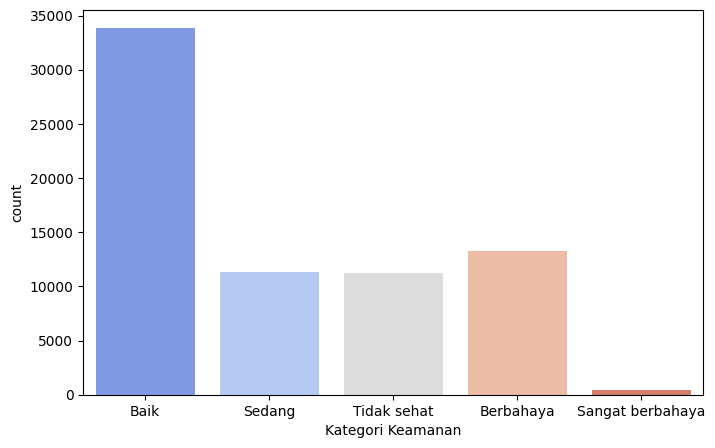

In [271]:
plt.figure(figsize=(8, 5))
sns.countplot(data=final_df, x="Kategori Keamanan", palette="coolwarm")

Dari barchart di atas, dapat kita lihat bahwa mayoritas dari polutan SO2 berada di kategori baik yang berarti kategori keamanan untuk tingkat SO2 masih bagus.


In [272]:
final_df['Kategori Keamanan'] = pd.cut(final_df['NO2'],
  bins=[0, 5, 10, 20, 100, 500],
  labels=["Baik", "Sedang", "Tidak sehat", "Berbahaya", "Sangat berbahaya"])

final_df[['NO2', 'Kategori Keamanan']].sample(10)

,NO2,Kategori Keamanan
48715,45.000000,Berbahaya
1486,26.953488,Berbahaya
9285,7.000000,Sedang
66563,50.000000,Berbahaya
53277,58.000000,Berbahaya
60992,33.000000,Berbahaya
50919,23.000000,Berbahaya
39645,22.000000,Berbahaya
3091,21.000000,Berbahaya
6173,72.060300,Berbahaya


<ipython-input-273-c8adc2c34bf3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_df, x="Kategori Keamanan", palette="coolwarm")


<Axes: xlabel='Kategori Keamanan', ylabel='count'>

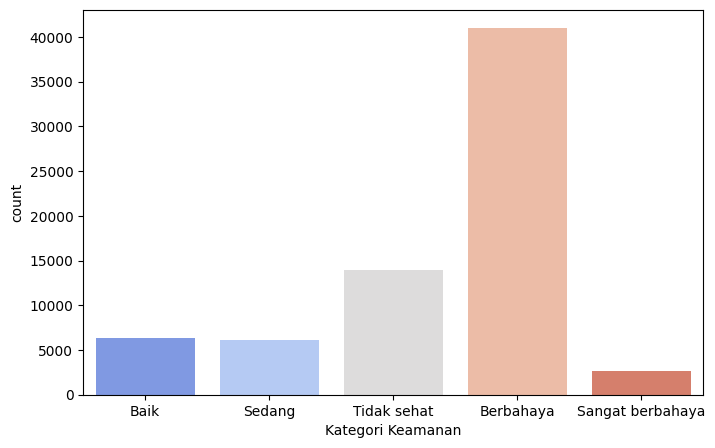

In [273]:
plt.figure(figsize=(8, 5))
sns.countplot(data=final_df, x="Kategori Keamanan", palette="coolwarm")

Dari barchart di atas, dapat kita lihat bahwa mayoritas dari polutan NO2 berada di kategori berbahaya. Ini menandakan bahwa polutan NO2 sangat banyak di stasiun Dingling dan Changping.

In [274]:
final_df['Kategori Keamanan'] = pd.cut(final_df['CO'],
  bins=[0, 25, 50, 200, 700, 10000],
  labels=["Baik", "Sedang", "Tidak sehat",  "Berbahaya", "Sangat berbahaya"])

final_df[['CO', 'Kategori Keamanan']].sample(10)

,CO,Kategori Keamanan
32254,1900.0,Sangat berbahaya
22771,1600.0,Sangat berbahaya
46157,1200.0,Sangat berbahaya
33134,1800.0,Sangat berbahaya
41162,200.0,Tidak sehat
13342,700.0,Berbahaya
53146,1900.0,Sangat berbahaya
12939,400.0,Berbahaya
5578,1500.0,Sangat berbahaya
17455,400.0,Berbahaya


<ipython-input-275-c8adc2c34bf3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_df, x="Kategori Keamanan", palette="coolwarm")


<Axes: xlabel='Kategori Keamanan', ylabel='count'>

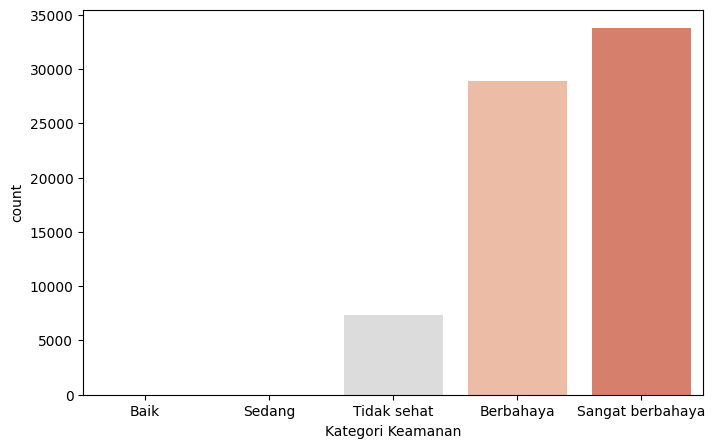

In [275]:
plt.figure(figsize=(8, 5))
sns.countplot(data=final_df, x="Kategori Keamanan", palette="coolwarm")

Dari barchart di atas, dapat kita lihat bahwa mayoritas dari polutan CO berada di kategori berbahaya dan sangat berbahaya. Ini berarti kadar polutan karbon monoksida di kedua stasiun bisa membahayakan orang di sekitar.

In [276]:
final_df['Kategori Keamanan'] = pd.cut(final_df['O3'],
  bins=[0, 5, 10, 20, 100, 500],
  labels=["Baik", "Sedang", "Tidak sehat", "Berbahaya", "Sangat berbahaya"])

final_df[['O3', 'Kategori Keamanan']].sample(10)

,O3,Kategori Keamanan
10095,240.0000,Sangat berbahaya
46376,61.0000,Berbahaya
6234,2.1420,Baik
10252,87.0000,Berbahaya
65626,53.0000,Berbahaya
41449,0.2142,Baik
68831,5.0000,Baik
54287,2.0000,Baik
68024,2.0000,Baik
58725,3.0000,Baik


<ipython-input-277-c8adc2c34bf3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_df, x="Kategori Keamanan", palette="coolwarm")


<Axes: xlabel='Kategori Keamanan', ylabel='count'>

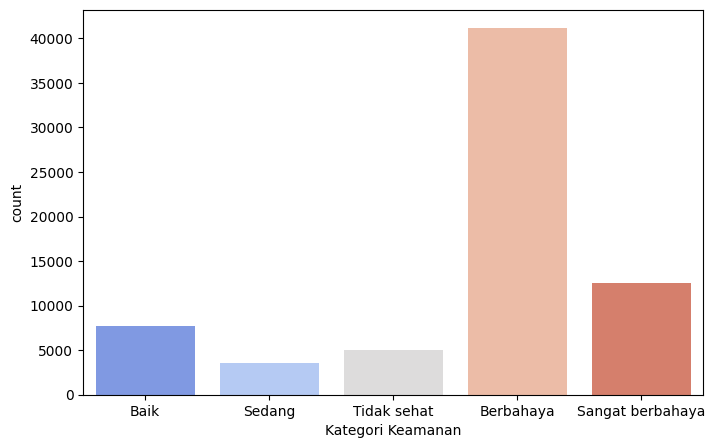

In [277]:
plt.figure(figsize=(8, 5))
sns.countplot(data=final_df, x="Kategori Keamanan", palette="coolwarm")

Dari barchart di atas, dapat kita lihat bahwa mayoritas dari polutan O3 berada di kategori berbahaya. Ini berarti kadar polutan O3 di kedua stasiun dapat menyebabkan kerugian pada orang sekitar.

## **Conclusion**

- Pertanyaan 1:
  
  Stasiun Dingling -
  1.   PM2.5 dan PM10 cenderung memiliki korelasi yang tinggi karena memiliki korelasi 0.85, yang berarti bahwa jika kadar PM2.5 naik, maka kadar PM10 juga akan naik.
  2.   PM2.5 & CO serta NO2 & CO memiliki korelasi yang tinggi dengan nilai 0.78, yang berarti bahwa mereka sering berkaitan.
  3. NO2 dan PM2.5 memiliki nilai korelasi tinggi sebanyak 0.71 serta NO2 dan PM10 yang memiliki nilai korelasi 0.65, juga menandakan bahwa ada keterkaitan tinggi antara mereka.
  4. SO2 dan NO2 memiliki korelasi yang sedang ke tinggi dengan nilai 0.62, yang menandakan bahwa SO2 sering muncul dengan NO2 (misal seperti pembakaran hutam, dll.)
  5. SO2 & PM2.5 memiliki nilai korelasi 0.47, serta SO2 & PM10 memiliki nilai korelasi 0.45 yang menandakan korelasi yang sedang ke lemah.
  6. O3 memiliki korelasi negatif dari -0.09 ke -0.35 dengan polutan lainnya. Ini wajar karena memnag ozon itu berasal dari sumber yang berbeda dengan polutan lainnya.

  Stasiun Changping -
  1.   PM2.5 dan PM10 cenderung memiliki korelasi yang tinggi karena memiliki korelasi 0.86, yang berarti bahwa jika kadar PM2.5 naik, maka kadar PM10 juga akan naik.
  2.   PM2.5 & CO serta NO2 & CO memiliki korelasi yang tinggi dengan nilai 0.74 dan 0.71 berturut turut, yang berarti bahwa mereka sering berkaitan.
  3. NO2 dan PM2.5 memiliki nilai korelasi tinggi sebanyak 0.67 serta NO2 dan PM10 yang memiliki nilai korelasi 0.63, juga menandakan bahwa ada keterkaitan tinggi antara mereka.
  4. SO2 dan NO2 memiliki korelasi yang sedang ke tinggi dengan nilai 0.49 serta SO2 dan CO memiliki korelasi serupa dengan nilai 0.52.
  5. SO2 & PM2.5 memiliki nilai korelasi 0.46, serta SO2 & PM10 memiliki nilai korelasi 0.43 yang menandakan korelasi yang sedang ke lemah.
  6. O3 memiliki korelasi negatif dari -0.09 ke -0.35 dengan polutan lainnya. Ini wajar karena memnag ozon itu berasal dari sumber yang berbeda dengan polutan lainnya.
- Pertanyaan 2: Perbandingan dari kedua stasiun menunjukkan bahwa kadar polutan di stasiun Changping selalu lebih besar daripada stasiun Dingling kecuali untuk kadar polutan O3. Ini menyatakan bahwa stasiun Changping memiliki kualitas udara yang lebih buruk dibandingkan dengan stasiun Dingling.
- Pertanyaan 3:
  *   Kadar PM2.5 mencapai titik tertinggi pada pukul 19:00 di stasiun Dingling, dan pukul 21:00 di stasiun Changping.
  *   Kadar PM10 mencapai titik tertinggi pada pukul 19:00 di stasiun Dingling, dan pukul 2O:00 di stasiun Changping.
  *   Kadar SO2 mencapai titik tertinggi pada pukul 12:00 di stasiun Dingling, dan pukul 10:00 di stasiun Changping.
  *   Kadar NO2 mencapai titik tertinggi pada pukul 19:00 di stasiun Dingling, dan pukul 20:00 di stasiun Changping.
  *   Kadar CO mencapai titik tertinggi pada pukul 21:00 di stasiun Dingling, dan pukul 09:00 di stasiun Changping.
  *   Kadar O3 mencapai titik tertinggi pada pukul 16:00 di stasiun Dingling, dan pukul 16:00 di stasiun Changping.